In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

1st step: load data At this step we are going to use MIST data set

In [ ]:
#Load data
minst = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = minst.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print("X_train.Shape = ", X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train.Shape =  (60000, 28, 28)


2nd step: instantiate the model

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape = (28, 28)),
          tf.keras.layers.Dense(128, activation = 'relu'),
              tf.keras.layers.Dense(64,activation = 'tanh'),
                  tf.keras.layers.Dropout(0.2),
                      tf.keras.layers.Dense(10, activation = 'softmax')
                      ])

3rd step: Train the model

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
                            metrics = ['accuracy'])

In [6]:
#Train the model
r = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),batch_size = 10, epochs=10)

Epoch 1/10
6000/6000 [==============================] - 27s 4ms/step - loss: 0.2167 - accuracy: 0.9345 - val_loss: 0.1098 - val_accuracy: 0.9650
Epoch 2/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.1025 - accuracy: 0.9689 - val_loss: 0.0929 - val_accuracy: 0.9734
Epoch 3/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0751 - accuracy: 0.9766 - val_loss: 0.0796 - val_accuracy: 0.9772
Epoch 4/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.0776 - val_accuracy: 0.9758
Epoch 5/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0515 - accuracy: 0.9842 - val_loss: 0.0874 - val_accuracy: 0.9744
Epoch 6/10
6000/6000 [==============================] - 21s 3ms/step - loss: 0.0414 - accuracy: 0.9865 - val_loss: 0.0781 - val_accuracy: 0.9787
Epoch 7/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0374 - accuracy: 0.9884 - val_loss: 0.0812 - val_ac

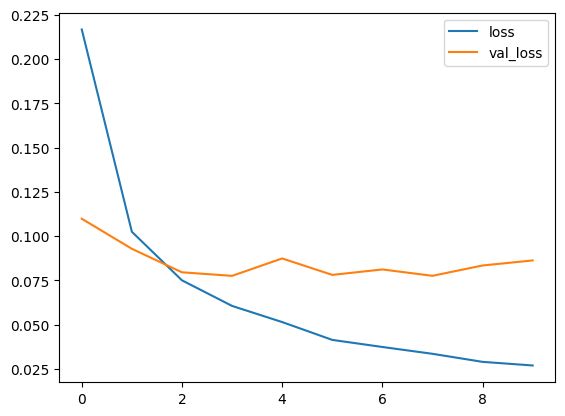

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

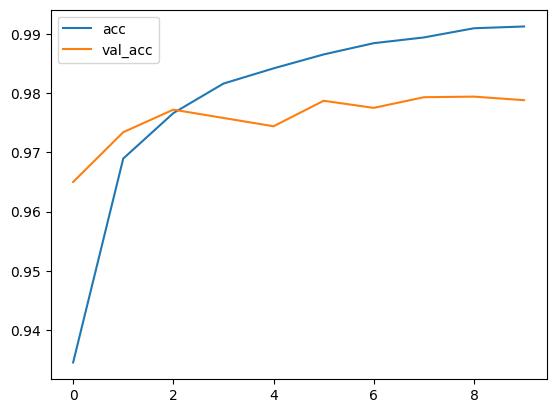

In [11]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[ 962    1    1    0    0    2    5    2    1    6]
 [   0 1128    1    0    0    2    2    0    2    0]
 [   3    2 1003    4    2    0    3    8    5    2]
 [   0    0    2  990    0    9    0    3    5    1]
 [   2    1    0    0  949    1    5    4    0   20]
 [   2    1    0    5    1  873    4    1    3    2]
 [   3    2    0    0    7    2  943    0    1    0]
 [   0    3    5    1    0    0    0 1008    3    8]
 [   6    0    1    5    3    7    3    3  942    4]
 [   0    2    0    3    6    0    2    5    1  990]]


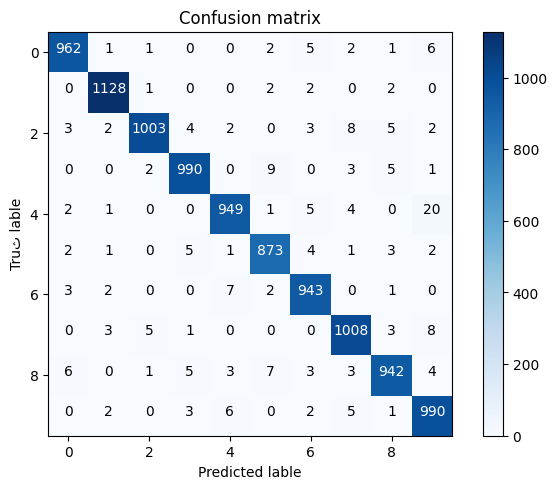

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plt_c_m(cm,classes,
            normalize =False,
            title = 'Confusion matrix',
            cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print("normalized confusion matrix")
  else:
      print("Confusion matrix, without normalization")
  print(cm)
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("Truث lable")
  plt.xlabel("Predicted lable")
  plt.show()
test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(Y_test, test)
plt_c_m(cm,list(range(10)), normalize = False)

Text(0.5, 1.0, 'True label is: 9 and predicted one is: 4')

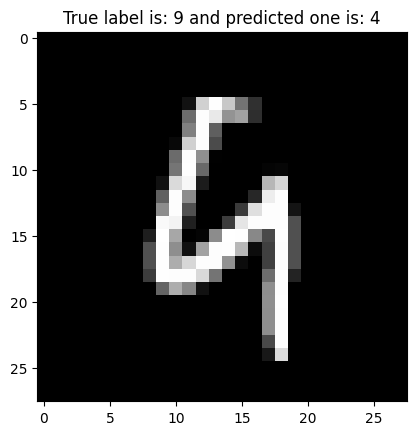

In [13]:
#Some misclassifid examples
misclassified_idx = np.where(test != Y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap = 'gray')
plt.title('True label is: %s and predicted one is: %s' % (Y_test[i], test[i]))